![](https://i.imgur.com/JsMvGnP.png)

## Projeto - Classificação

## 1. Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import numpy as np

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Figure size 720x432 with 0 Axes>

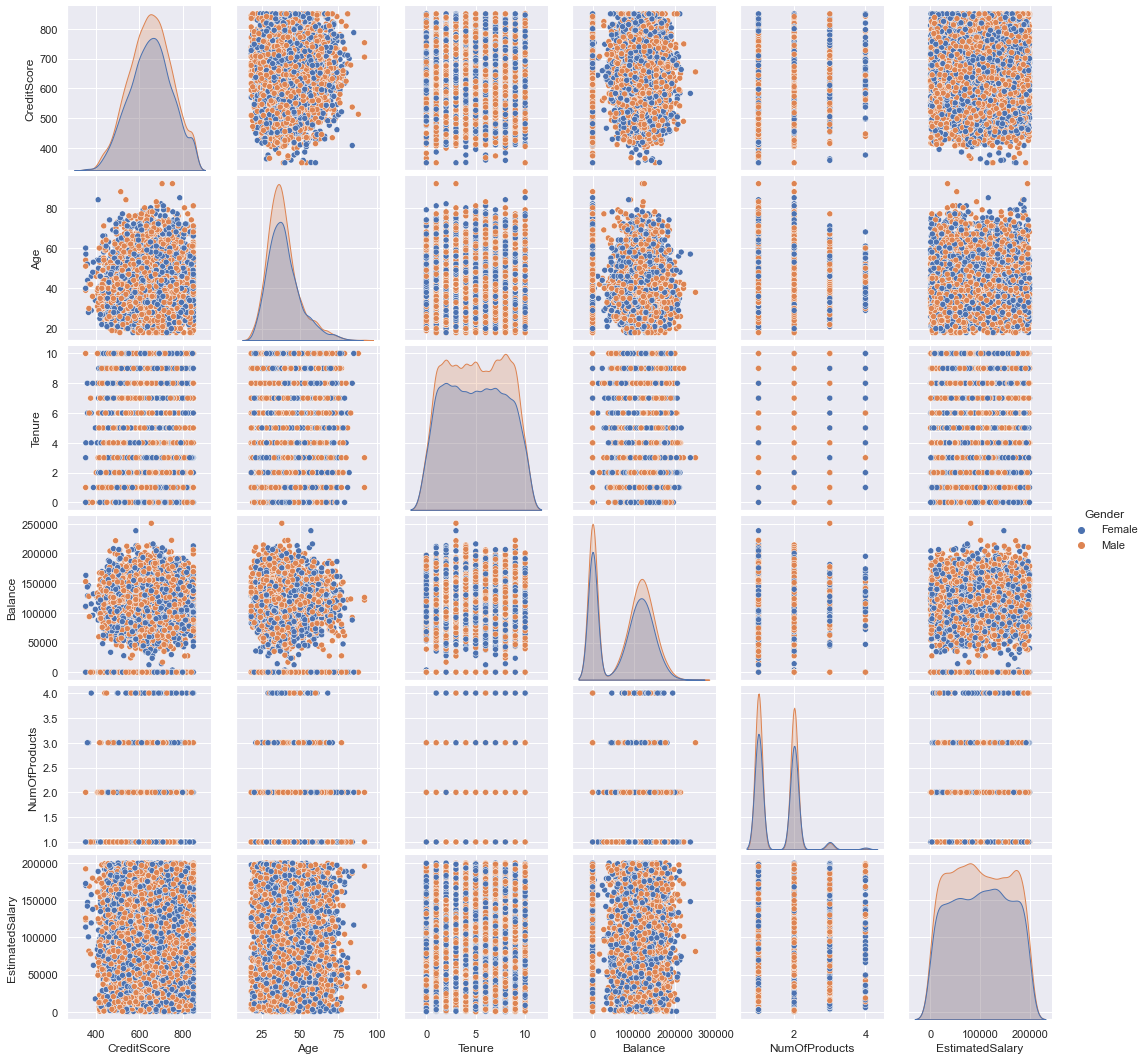

In [29]:
plt.figure(figsize=[10,6])
sns.pairplot(data = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Geography', 'Gender']], hue='Gender')
plt.show()

<Figure size 720x432 with 0 Axes>

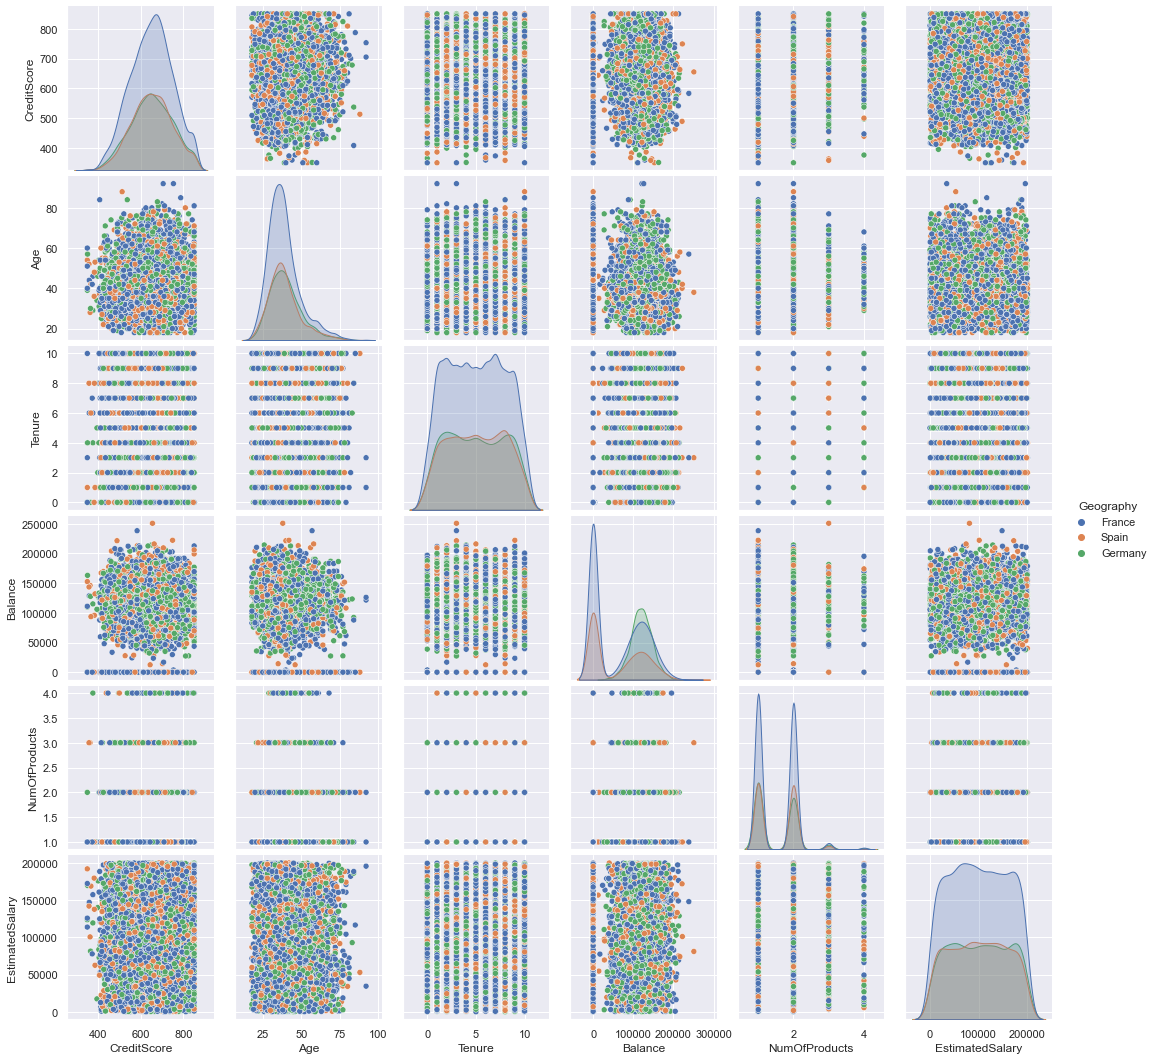

In [30]:
plt.figure(figsize=[10,6])
sns.pairplot(data = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Geography', 'Gender']], hue='Geography')
plt.show()

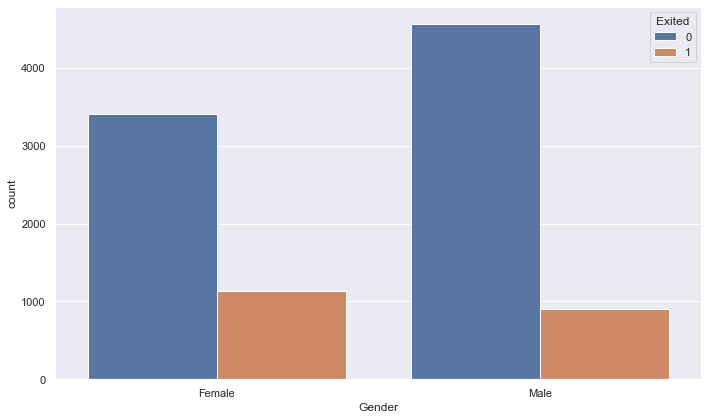

In [36]:
plt.figure(figsize=[10,6])
sns.countplot(data=df,x = 'Gender', hue='Exited')
plt.tight_layout()
plt.show()

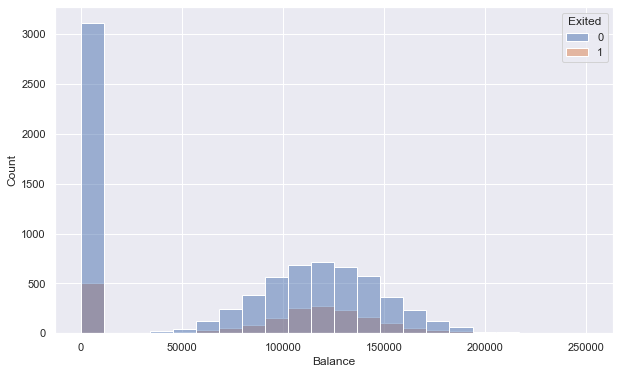

In [58]:
plt.figure(figsize=[10,6])
sns.set_theme(style='darkgrid')
sns.histplot(data=df, x='Balance', hue='Exited')
plt.show()

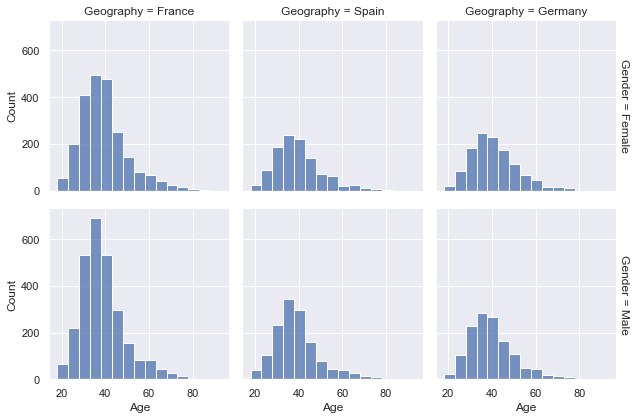

In [37]:
sns.set_theme(style='darkgrid')
sns.displot(
    df, x='Age', col='Geography', row='Gender',
    binwidth=5, height=3, facet_kws=dict(margin_titles=True),
)

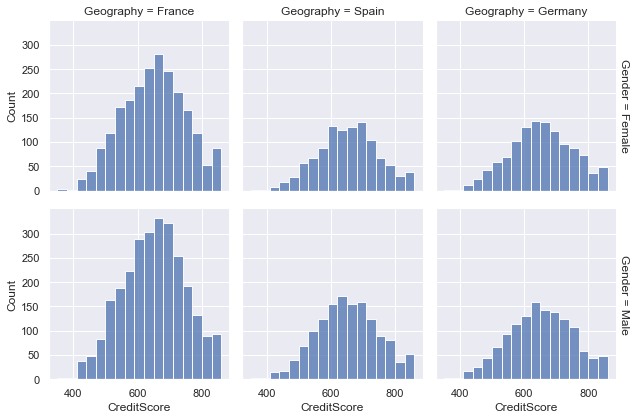

In [44]:
sns.set_theme(style='darkgrid')
sns.displot(
    df, x='CreditScore', col='Geography', row='Gender',
    binwidth=30, height=3, facet_kws=dict(margin_titles=True),
)

In [65]:
correlacao = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']].corr(method='pearson')

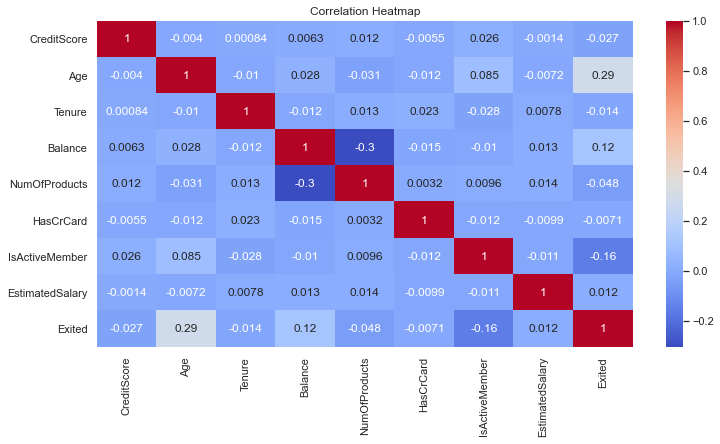

In [66]:
plt.figure(figsize=[12,6])
sns.heatmap(data=correlacao, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

### 3.2 Preparação e limpeza dos dados

In [45]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
#Dropping irrelevant collums
coldrops = ['RowNumber', 'CustomerId', 'Surname']
df_clean = df.drop(columns=coldrops)

In [72]:
df_clean.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [73]:
df_clean['Balance']=df_clean['Balance'].apply(np.log1p)
df_clean['EstimatedSalary']=df_clean['EstimatedSalary'].apply(np.log1p)
df_clean['CreditScore']=df_clean['CreditScore'].apply(np.log1p)

In [74]:
df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,6.429719,France,Female,42,2,0.000000,1,1,1,11.526334,1
1,6.411818,Spain,Female,41,1,11.336294,1,0,1,11.631096,0
2,6.220590,France,Female,42,8,11.980813,3,1,0,11.643362,1
3,6.551080,France,Female,39,1,0.000000,2,0,0,11.449215,0
4,6.746412,Spain,Female,43,2,11.740155,1,1,1,11.278280,0


In [77]:
#Converting Gender Female/Male flags to float
df_clean = df_clean.replace({'Female': float(0.0), 'Male': float(1.0)})

In [81]:
#Converting Geography variable through OHC
df_clean=pd.get_dummies(df_clean, columns=['Geography'])

In [87]:
#Rearranging data
df_clean = df_clean[['Gender','Age', 'NumOfProducts','Tenure', 'CreditScore',
          'Balance', 'EstimatedSalary','HasCrCard', 'IsActiveMember',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
           'Exited']]

In [90]:
df_clean.head()

,Gender,Age,NumOfProducts,Tenure,CreditScore,Balance,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Exited
0,0.0,42,1,2,6.429719,0.000000,11.526334,1,1,1,0,0,1
1,0.0,41,1,1,6.411818,11.336294,11.631096,0,1,0,0,1,0
2,0.0,42,3,8,6.220590,11.980813,11.643362,1,0,1,0,0,1
3,0.0,39,2,1,6.551080,0.000000,11.449215,0,0,1,0,0,0
4,0.0,43,1,2,6.746412,11.740155,11.278280,1,1,0,0,1,0


### 3.3 Seleção de atributos

In [91]:
from sklearn.model_selection import train_test_split
X = df_clean.drop(['Exited'],axis = 1)
y = df_clean['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

### 3.4 Construção do modelo

In [93]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state=0)
lreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [94]:
y_pred = lreg.predict(X_test)

### 3.5 Avaliação do modelo

In [95]:
acuracia = np.mean(y_pred==y_test)
acuracia

0.8125

In [96]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lreg.predict_proba(X_test)[:, 1])

0.7713889856418593

### 3.4 Otimização do modelo

##### Testando Diversos modelos

In [102]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [106]:
def ml_model(X_train,X_test, y_train, y_test):
  MLA = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB(),xgb.XGBClassifier(objective="binary:logistic")]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    y_pred = alg.fit(X_train, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 2)
    MLA_compare.loc[row_index, 'ROC AUC Score Test'] = round(roc_auc_score(y_test, y_pred),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  
ml_model(X_train,X_test, y_train, y_test)

C:\Users\Lipe\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model Name,Train Accuracy,Test Accuracy,ROC AUC Score Test
4,XGBClassifier,0.95,0.86,0.74
1,KNeighborsClassifier,0.87,0.82,0.65
0,LogisticRegression,0.81,0.81,0.60
3,GaussianNB,0.81,0.81,0.66
2,DecisionTreeClassifier,1.00,0.80,0.71


##### Melhorando o XGBoost Classifier

In [123]:
# Calibração de modelo
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

parameters=[{'learning_rate':[0.1,0.2,0.3],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 90, 100 ,110 ,120, 150, 200]}]
            
xgb = xgb.XGBClassifier(objective="binary:logistic", n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=5)
gs.fit(X_train, y_train)

C:\Users\Lipe\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=1, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [124]:
gs.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}

In [125]:
reg = gs.best_estimator_

In [119]:
from sklearn.model_selection import cross_val_score
train_score = reg.score(X_train, y_train)
val_score = cross_val_score(reg, X_train, y_train, cv=5)
test_score = reg.score(X_test, y_test)
print('='*80)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

C:\Users\Lipe\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [126]:
roc_auc_score(y_test, reg.predict_proba(X_test)[:, 1])

0.8710847943031851

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.